In [247]:
!pip install librosa numpy soundfile
!pip install noisereduce
!pip install pydub
!apt-get install ffmpeg  # For Linux environments



E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [248]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_audio(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of Audio')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

    return y, sr

# Usage
# audio_file_path = 'sample_audio2.ogg'  # Replace with your file path



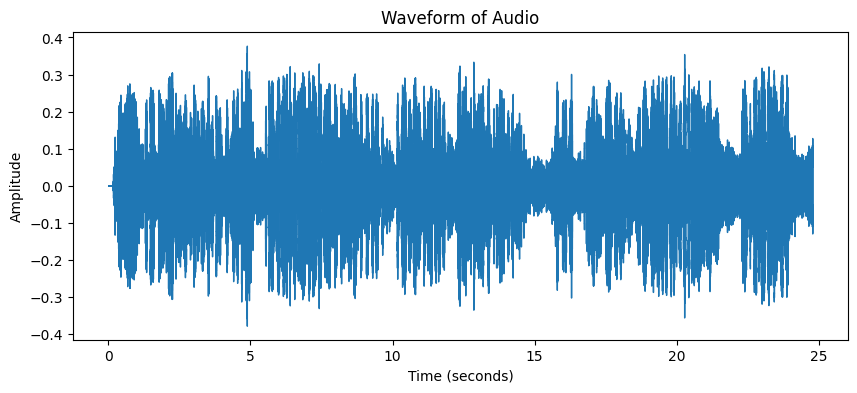

In [249]:
from pydub import AudioSegment
import os 

def convert_mp3_to_wav(input_file, output_file):
    # Load .ogg file
    audio = AudioSegment.from_mp3(input_file)
    # Export as .wav
    audio.export(output_file, format="wav")
def convert_ogg_to_wav(input_file, output_file):
    # Load .ogg file
    audio = AudioSegment.from_ogg(input_file)
    # Export as .wav
    audio.export(output_file, format="wav")

# Usage
# input_ogg_file = os.path.join('models','archive','cv-valid-train','cv-valid-train','sample-000010.mp3')  # Replace with your .mp3 file path
input_ogg_file ='sample_audio1.ogg'  # Replace with your .ogg file path
output_wav_file = 'converted_audio.wav'  # Desired output file name
# convert_mp3_to_wav(input_ogg_file, output_wav_file)
convert_ogg_to_wav(input_ogg_file, output_wav_file)
y, sr = load_audio(output_wav_file)


In [250]:
import noisereduce as nr

def reduce_noise(y, sr):
    """
    Reduce noise from the audio signal.
    """
    # Apply noise reduction
    y_denoised = nr.reduce_noise(y=y, sr=sr)
    return y_denoised


In [251]:
import numpy as np

def detect_pitch(y, sr):
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Extract the pitch values
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch = pitches[index, t]
        if pitch > 0:  # Filter out the 0 values
            pitch_values.append(pitch)

    # Calculate the average pitch, filtering out outliers
    if pitch_values:
        # Use median to reduce the influence of outliers
        avg_pitch = np.median(pitch_values)
    else:
        avg_pitch = 0

    print(f"Average Pitch: {avg_pitch:.2f} Hz")
    return avg_pitch


# Usage
avg_pitch = detect_pitch(y, sr)


Average Pitch: 401.90 Hz


In [252]:
def detect_speech_rate(y, sr):
    # Detect speech segments using librosa's effects.split
    speech_segments = librosa.effects.split(y)
    duration = librosa.get_duration(y=y, sr=sr)
    speech_duration = np.sum([(end - start) for start, end in speech_segments]) / sr
    
    # Calculate speech rate (segments per second)
    speech_rate = len(speech_segments) / duration if duration > 0 else 0
    
    # Classify speech rate
    if speech_rate < 0.25:
        rate_classification = 'Slow Speech'
    elif 0.25 <= speech_rate <= 0.5:
        rate_classification = 'Normal Speech'
    else:
        rate_classification = 'Fast Speech'

    print(f"Speech Rate: {speech_rate:.2f} segments per second ({rate_classification})")
    return speech_rate, rate_classification


In [253]:
def detect_gender(avg_pitch):
    # Simple thresholding to classify gender based on pitch
    if avg_pitch < 160:
        gender = 'Female'
    else:
        gender = 'Male'

    print(f"Detected Gender: {gender}")
    return gender

# Usage
gender = detect_gender(avg_pitch)


Detected Gender: Male


In [254]:
def detect_intimacy(avg_pitch, speech_rate):
    # Define thresholds for intimacy detection
    pitch_threshold = 200  # Example threshold for lower pitch
    speech_rate_threshold = 2.5  # Example threshold for slow speech

    # Classify intimacy
    if avg_pitch < pitch_threshold and speech_rate < speech_rate_threshold:
        intimacy_status = "High Intimacy"
    elif avg_pitch < pitch_threshold or speech_rate < speech_rate_threshold:
        intimacy_status = "Moderate Intimacy"
    else:
        intimacy_status = "Low Intimacy"

    return intimacy_status


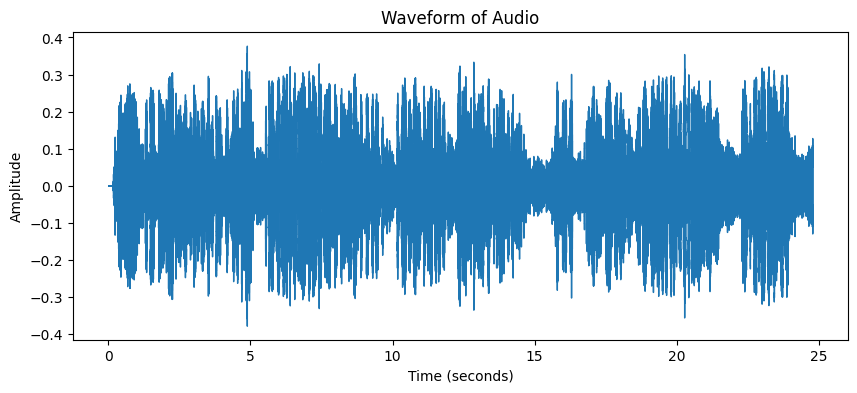

Average Pitch: 527.65 Hz
Speech Rate: 0.12 segments per second (Slow Speech)
Average Pitch: 527.65 Hz
Detected Speech Rate: Slow Speech
Intimacy Status: Moderate Intimacy


In [255]:
# Complete audio processing and intimacy detection
def process_audio_file(audio_file_path):
    # Load the audio file
    y, sr = load_audio(audio_file_path)
    
    # Reduce noise from the audio signal
    y_denoised = reduce_noise(y, sr)
    
    # Detect the average pitch from the denoised audio
    avg_pitch = detect_pitch(y_denoised, sr)
    
    # Detect speech rate
    speech_rate, rate_classification = detect_speech_rate(y_denoised, sr)
    
    # Detect intimacy based on pitch and speech rate
    intimacy_status = detect_intimacy(avg_pitch, speech_rate)
    
    return avg_pitch, rate_classification, intimacy_status

# Usage
# audio_file_path = 'your_audio_file.ogg'  # Replace with your .ogg file
avg_pitch, rate_classification, intimacy_status = process_audio_file(output_wav_file)

print(f"Average Pitch: {avg_pitch:.2f} Hz")
print(f"Detected Speech Rate: {rate_classification}")
print(f"Intimacy Status: {intimacy_status}")


In [256]:
!rm -rf converted_audio.wav  # use this command for linux and cmd 
!Remove-Item -Recurse -Force  converted_audio.wav  # use this command for windows powershell

/bin/bash: line 1: Remove-Item: command not found
